<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/unsupervised_learning_k_means_ict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.shape

(200, 5)

In [10]:
data['CustomerID'].nunique()

200

In [13]:
#can do encoding but here now we are using mapping
data['Genre']=data['Genre'].map({'Male':1,'Female':0})

In [14]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
#there is no target because it is un-supervised learning

In [16]:
x=data.drop(['CustomerID'],axis=1)

In [ ]:
#KMeans

In [18]:
from sklearn.cluster import KMeans

In [21]:
wcss=[]
for i in range(1,11):
 km=KMeans(n_clusters=i,n_init=10)
 km.fit(x)
 css=km.inertia_
 wcss.append(css)

In [22]:
wcss

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58350.65449462818,
 51167.2466295748,
 48056.725291252864,
 41245.60642959189,
 37759.983127208914]

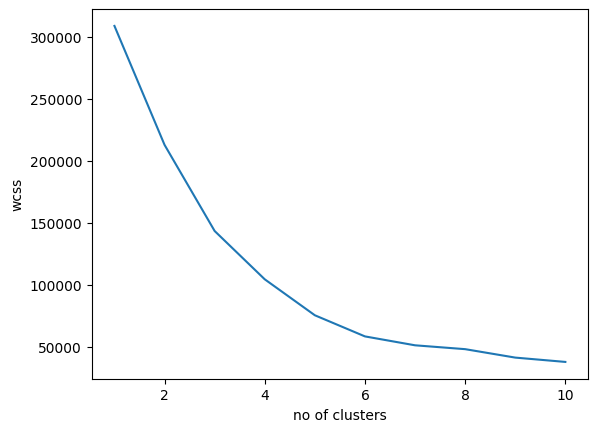

In [24]:
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#drastic change shows in 5... so 5 is the optimum no of clusters

In [ ]:
#from elbow method 5 is the optimum no of clusters

In [26]:
km=KMeans(n_clusters=5,n_init=10)

In [27]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [28]:
y_km=km.predict(x)

In [29]:
y_km

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [30]:
pd.Series(y_km).value_counts()

0    79
4    39
1    36
2    23
3    23
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

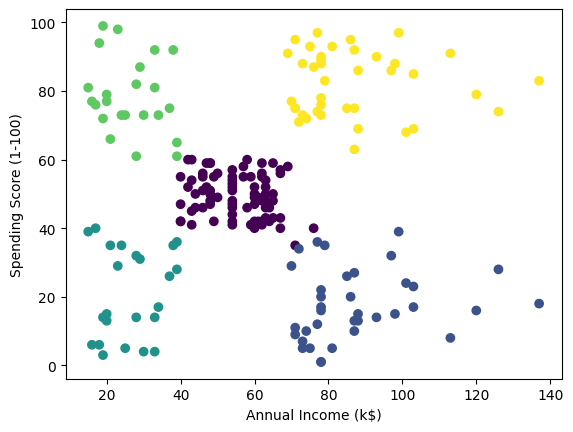

In [32]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=y_km)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show

In [33]:
data['Cluster']=y_km

In [34]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2


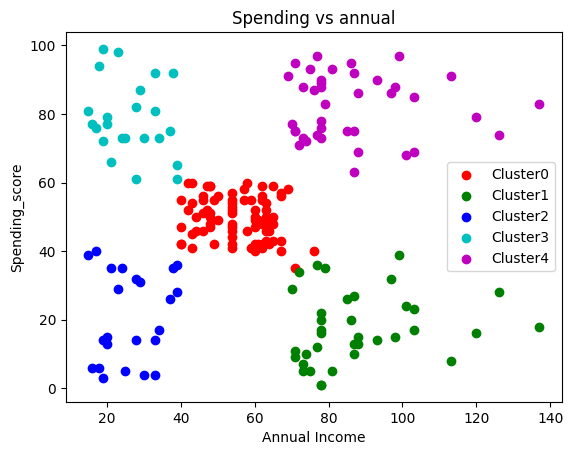

In [39]:
colors=['r','g','b','c','m']
for i in range(max(y_km)+1):
  cluster_data=x[y_km==i]
  plt.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Annual Income')
plt.ylabel('Spending_score')
plt.title('Spending vs annual')
plt.legend()